# 2do Examen Parcial

Joel Fayam Rivera Peña 2076323

In [ ]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
BIL=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

## Análisis exploratorio

In [ ]:
BIL.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


In [ ]:
BIL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   saldo_cuenta             1000 non-null   object
 1   meses                    1000 non-null   int64 
 2   historia_crediticia      1000 non-null   object
 3   uso                      1000 non-null   object
 4   cantidad                 1000 non-null   int64 
 5   saldo_cuenta_ahorro      817 non-null    object
 6   años_trabajando          1000 non-null   object
 7   tasa_de_interes          1000 non-null   int64 
 8   genero_estado_civil      1000 non-null   object
 9   aval                     52 non-null     object
 10  años_actual_domicilio    1000 non-null   int64 
 11  activos                  1000 non-null   object
 12  edad                     1000 non-null   int64 
 13  planes_de_pago           186 non-null    object
 14  casa                     1000 non-null   

a) Cuantas variables y cuantas observaciones tiene la base <br>
La base de datos cuenta con 21 variables distintas y 1000 observaciones.


In [ ]:
BIL['cantidad'].mean()

3271.258

b) Cuál es el monto promedio de los créditos otorgados por el banco <br>
El monto promedio de los créditos otorgados por el banco es de 3,271.258 euros

In [ ]:
BIL.query('credito_pagado==1')['meses'].mean().round(2)

19.21

c) Cuáles  el  tiempo  promedio  que  se  tardaron  en  pagar  el  préstamo  los que pagaron el préstamo en su totalidad<br>
El tiempo promedio que se tardaron en pagar el préstamo los que lo pagaron en su totalidad es de 19.21 meses

In [ ]:
BIL['tasa_de_interes'].mean()

2.973

d) Cuáles la tasa de interés promedio otorgada por el banco
La tasa de interés promedio otorgada por el banco es de 2.973%

In [ ]:
BIL.query('credito_pagado==1')['cantidad'].mean().round(2), BIL.query('credito_pagado==1')['tasa_de_interes'].mean().round(2)

(2985.46, 2.92)

e) Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron <br>
El monto promedio de los que ya pagaron es de 2985.36 euros, mientras que la tasa de interés promedio es de 2.92%

In [ ]:
BIL.query('credito_pagado==0')['cantidad'].mean().round(2), BIL.query('credito_pagado==0')['tasa_de_interes'].mean().round(2)

(3938.13, 3.1)

f) Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado <br>
El monto promedio de los que no han pagado por completo es de 3938.13 euros, mientras que la tasa de interés promedio es de 3.1%

## Estimación Modelo Kaplan-Meier

In [ ]:
pip install lifelines

In [ ]:
# Librería para el Modelo Kaplan-Meier
from lifelines import KaplanMeierFitter

In [ ]:
km=KaplanMeierFitter().fit(BIL['meses'],BIL['credito_pagado'])

In [ ]:
km.median_survival_time_

24.0

a)cuál es la mediana del tiempo y que significa

La mediana es de 24 meses, lo que implica que la mitad de los créditos se terminan de pagar después de los 24 meses y la otra mitad antes de los 24 meses.

b)es mayor/menor que el tiempo promedio del inciso 1c
Como observamos, la mediana es mayor al tiempo promedio de pago completo a quienes lo liquidaron en su totalidad. Esto nos puede ayudar a ver el cambio entre que las personas suelen terminar los pagos de sus créditos a pagos en contraste a aquellas que lo liquidan y por ende tardan menos tiempo.

## Conclusiones sobre el riesgo

In [ ]:
from lifelines import ExponentialFitter, LogNormalFitter, WeibullFitter
pruebas=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

In [ ]:
exponen=ExponentialFitter().fit(pruebas['meses'],pruebas['credito_pagado'])
weibull=WeibullFitter().fit(pruebas['meses'],pruebas['credito_pagado'])
lognor=LogNormalFitter().fit(pruebas['meses'],pruebas['credito_pagado'])

In [ ]:
print('AIC para determinar el mejor modelo')
print('Exponencial: ',exponen.AIC_.round(2),', Weibull: ',weibull.AIC_.round(2),'Log Normal: ',lognor.AIC_.round(2))

AIC para determinar el mejor modelo
Exponencial:  6157.19 , Weibull:  5900.98 Log Normal:  5813.75


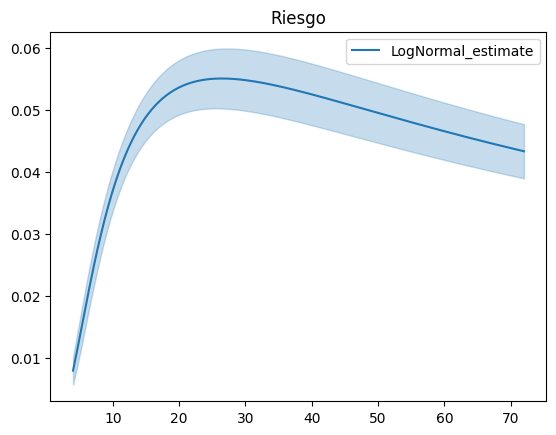

In [ ]:
lognor.plot_hazard()
plt.title('Riesgo')
plt.show()

Realizamos distintos modelos y calculamos el AIC para determinar cual es el mejor modelo que se puede estimar para determinar como es que se modelan los datos y el riesgo. Observamos que el modelo Log-Normal es el que mejor se ajusta a los datos, y gracias a ello podemos decir que el riesgo de que el préstamo se pague en su totalidad es de tipo log-normal con respecto al tiempo.

In [ ]:
datos=pd.DataFrame(lognor.hazard_)
datos

,LogNormal_estimate
4.000000,0.007982
4.136273,0.008671
4.272545,0.009375
4.408818,0.010091
4.545090,0.010819
...,...
71.454910,0.043464
71.591182,0.043430
71.727455,0.043395
71.863727,0.043361


In [ ]:
# Encontramos el tiempo y valor máximo de la función de riesgo para conocer el tiempo en el que la función pasa de creciente a decreciente.
datos.sort_values('LogNormal_estimate',ascending=False).head(1)

,LogNormal_estimate
26.48497,0.055046


## Estimación de Modelos de Cox

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
BIL2=BIL[['meses','credito_pagado','cantidad','tasa_de_interes','edad','numero_creditos','casa','dependientes_economicos']]

In [ ]:
BIL2['dependientes_economicos']=BIL2['dependientes_economicos']-1

In [ ]:
BIL2.head()

,meses,credito_pagado,cantidad,tasa_de_interes,edad,numero_creditos,casa,dependientes_economicos
0,6,1,1169,4,67,2,propia,0
1,48,0,5951,2,22,1,propia,0
2,12,1,2096,2,49,1,propia,1
3,42,1,7882,2,45,1,prestada,1
4,24,0,4870,3,53,2,prestada,1


In [ ]:
dummies_casa=pd.get_dummies(BIL2['casa']).astype(int)

In [ ]:
dummies_casa.head()

,prestada,propia,renta
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
BIL3=pd.concat([BIL2,dummies_casa],axis=1)

In [ ]:
BIL3.drop(['casa','prestada'],axis=1,inplace=True)

In [ ]:
BIL3.head()

,meses,credito_pagado,cantidad,tasa_de_interes,edad,numero_creditos,dependientes_economicos,propia,renta
0,6,1,1169,4,67,2,0,1,0
1,48,0,5951,2,22,1,0,1,0
2,12,1,2096,2,49,1,1,1,0
3,42,1,7882,2,45,1,1,0,0
4,24,0,4870,3,53,2,1,0,0


In [ ]:
cph=CoxPHFitter().fit(BIL3,'meses','credito_pagado')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4053.43
         time fit was run = 2023-10-04 16:45:21 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
cantidad                 -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tasa_de_interes          -0.41       0.66       0.04            -0.48            -0.34                 0.62                 0.71
edad                      0.02       1.02       0.00             0.01             0.02                 1.01                 1.02
numero_creditos           0.11       1.11       0.07            -0.02             0.24                 0.98                 1.27
dependientes_economicos   0.06       1.06       0.11            -0.15             0.27                 0.86                 1.31
propia                    0.39       1.48       0.14             0.12             0.67                 1.13                 1.95
renta                     0.32       1.38       0.17            -0.01             0.65                 0.99                 1.92

                          cmp to      z      p   -log2(p)
covariate                                                
cantidad                    0.00 -15.99 <0.005     188.81
tasa_de_interes             0.00 -11.24 <0.005      95.04
edad                        0.00   4.73 <0.005      18.73
numero_creditos             0.00   1.59   0.11       3.16
dependientes_economicos     0.00   0.58   0.56       0.84
propia                      0.00   2.84 <0.005       7.80
renta                       0.00   1.88   0.06       4.05
---
Concordance = 0.78
Partial AIC = 8120.86
log-likelihood ratio test = 431.91 on 7 df
-log2(p) of ll-ratio test = 293.88

In [ ]:
cph.hazard_ratios_

covariate
cantidad                   0.999626
tasa_de_interes            0.662070
edad                       1.016670
numero_creditos            1.112713
dependientes_economicos    1.064325
propia                     1.483478
renta                      1.376078
Name: exp(coef), dtype: float64

## Análisis de los coeficientes ##
1. Cantidad <br>
El p-value es menor a alfa, por lo que la cantidad influye en el riesgo de que el cliente pague completamente el riesgo. El riesgo de que se pague completamente el préstamo disminuye en un 0.0374% por cada unidad que aumente el monto del préstamo.
2. Tasa de interes <br>
El p-value es menor a alfa, por lo que la tasa de interes influye en el riesgo de que el cleinte pague completamente el riesgo. El riesgo de que se pague completamente el préstamo disminuye en un 34% por cada aumento en la tasa de interés.
3. Edad <br>
El p-value es menor a alfa, por lo que la edad influye en el riesgo de que el cleinte pague completamente el riesgo. El riesgo de que se pague completamente el préstamo aumenta en un 2% por cada año de edad que aumenta.
4. Número de creditos <br>
El p-value es mayor a alfa, por lo que la variable del número de creditos no es estadísticamente significativa y no influye en el riesgo de que se pague completamente el préstamo.
5. Dependientes económicos <br>
El p-value es mayor a alfa, por lo que la variable del número de dependientes económicos no es estadísticamente significativa y no influye en el riesgo de que se pague completamente el préstamo.
6. Casa propia <br>
El p-value es menor a alfa, por lo que tener casa propia influye en el riesgo de que se pague completamente un crédito. El riesgo de que alguien con casa propia pague completamente el préstamo aumenta en un 48% con respecto a alguien con casa prestada.
7. Casa rentada <br>
El p-value es mayor a alfa, por lo que tener casa rentada no influye en el riesgo de que se pague completamente el préstamo con respecto a alguien con casa prestada.

## Conclusiones

Gracias al análisis realizado empleando el modelo Cox obtenemos valiosa información sobre cómo ciertas variables influyen en el riesgo de que un préstamo sea pagado completamente. Para dicho análisis se tomaron en cuenta las siguientes variables que se consideró tendrían mayor influencia en el riesgo: cantidad del monto prestado, la tasa de interés del préstamo, edad, número de créditos en su historial, número de dependientes económicos, si cuenta con casa propia, rentada o prestada.
<br>
Gracias al análisis de riesgo que realizamos con ayuda de un modelo LogNormal conocemos que el riesgo es creciente desde el inicio hasta los 26 meses aproximadamente y a partir de ese periodo de tiempo empieza a ser decreciente. Este tiempo es ligeramente superior a la mediana estimada con el modelo Kaplan-Meier (24 meses) sin embargo, nos refleja como es que el riesgo de que se completa el pago empieza a decrecer poco después de los 26 meses y para tener una mayor información de porqué podría suceder esto, optamos por realizar un modelo Cox, como anteriormente mencionamos, que nos permita conocer que variables aumentan o disminuyen dicho riesgo.
<br>
Tras realizar el analizar y observar el cómo influyen las variables, nos damos cuenta que la más  importante de estas vendría siendo la tasa de interés la cual disminuye el riesgo de que se pague completamente un préstamo en un 34% por cada aumento en la tasa de interés. Esto a su vez se puede corroborar con el análisis estadístico realizado al inicio donde observamos que aquellos clientes que no han completado el pago de su préstamo tienen en promedio una mayor tasa de interés con respecto a aquellos que sí lo concretaron. Por otro lado vemos que hay variables que influyen, sin embargo es tan poco el cambio que podríamos considerar no darles tanta relevancia tales como lo es la edad del cliente o el monto que pide prestado. Sin embargo, es importante mencionar que en el caso del monto el riesgo disminuye en un 0.0374% por cada aumento en el tiempo por lo que a medida que aumenta considerablemente el monto la influencia de esta variable se empieza a notar más. Por otro lado, hay variables que su influencia no es siquiera mínima sino nula, las cuales son el número de créditos solicitados y el número de dependientes económicos, dichas variables no son estadísticamente significativas por lo que podríamos considerar ignorarlas al momento de realizar un nuevo protocolo de otorgamiento de préstamos. Por último, una variable de la cual no se ha comunicado los resultados es la de el tipo de casa que tienen. En esta variable, nuestras conclusiones serán una comparativa con respecto a aquellos que cuentan con una casa prestada, ya que observamos que aquellos que cuentan con casa propia aumenta el riesgo de pagar completamente el préstamo en un 48% con respecto a aquellos con casa prestada mientras que aquellos con casa rentada no tienen una influencia significativa con respecto a aquellos con casa prestada. Debido a esto, con todas las variables observadas y analizadas, concluimos que la mejor opción a tomar para mantener controlado el riesgo de que se complete el pago de préstamos es tener en consideración los aumentos en las tasas de intereses para disminuir el riesgo así cómo vigilar que tan altos serán los montos. Además de ello, se puede ignorar el número de créditos y dependientes económicos y dar paso a analizar nuevas variables en el futuro para dar con una mejor estrategia.